In [1]:
include("../src/crustDistribution.jl")
using Plots; gr();
using DelimitedFiles
using Statistics
include("../src/utilities.jl")
using StatGeochem

Loading crust information from file ../data/crustDistribution.jld


In [75]:
upper, h = readdlm("../data/litho1.0/lith_layer6.csv", ',', header=true)

([-89.0 -180.0 … 5.27284 3875.8; -89.0 -179.0 … 3.24747 2520.56; … ; 83.0 -26.0 … 3.55405 2752.83; 83.0 -25.0 … 3.5730999999999997 2771.4], AbstractString["Lat" "Long" … "Vs" "Rho"])

In [142]:
print(h)

AbstractString["Lat" "Long" "Vp" "Vs" "Rho"]

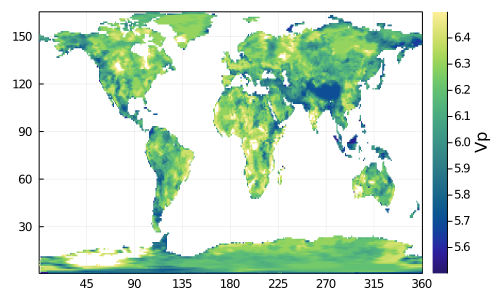

In [144]:
g = globe(upper[:,1], upper[:,2], upper[:,3]); 
g[g.>6.5] .= NaN
g[g.<5.5] .= NaN
heatmap(g, colorbar_title="Vp", size=(500,300),xticks=linspace(0,360,9),
    framestyle=:box,color=cgrad(:haline))

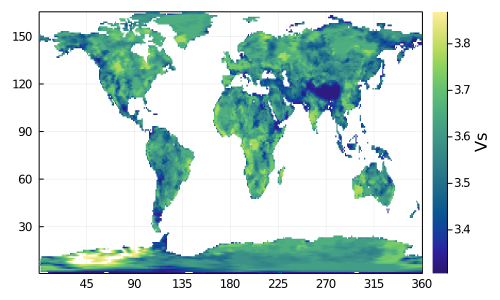

In [98]:
(low, high) = quantile(upper[:,4], (1/100, .99))
g = globe(upper[:,1], upper[:,2], upper[:,4]); 
g[g.>high] .= NaN
g[g.<low] .= NaN
heatmap(g, colorbar_title="Vs", size=(500,300),xticks=linspace(0,360,9),
    framestyle=:box,color=cgrad(:haline))

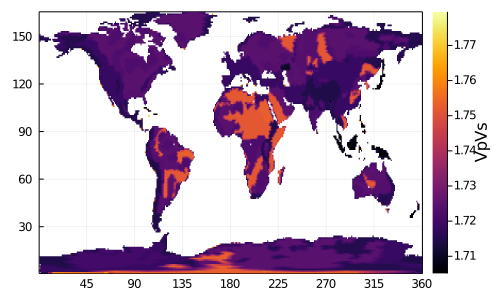

In [91]:
g = globe(upper[:,1], upper[:,2], upper[:,3]./upper[:,4]); 
g[g.>1.78] .= NaN
#g[g.<5.5] .= NaN
heatmap(g, colorbar_title="VpVs", size=(500,300),xticks=linspace(0,360,9),
    framestyle=:box)

# G3Dv3

Crust velocity estimates look very low resolution, higher in NA and Europe -- this suggests to me that they closely map to the starting velocity map, which is Crust2.0 in the crust outside of NA and Europe. 

In [122]:
g3d_vp = readdlm("../data/G3Dv3/LLNL_G3Dv3.Interpolated.Layer09_Upper_Crust_top.txt");
g3d_vp2 = readdlm("../data/G3Dv3/LLNL_G3Dv3.Interpolated.Layer10_Upper_Crust_bottom.txt");
g3d_vp_middle = readdlm("../data/G3Dv3/LLNL_G3Dv3.Interpolated.Layer11_Middle_Crust_top.txt");
g3d_vp_lower = readdlm("../data/G3Dv3/LLNL_G3Dv3.Interpolated.Layer13_Lower_Crust_top.txt");


### Are "top" and "bottom" layers same?

In [104]:
g3d_vp[:,2:end] == g3d_vp2[:,2:end]

true

### Plot

In [2]:
coord = readdlm("../data/G3Dv3/LLNL_G3Dv3.Interpolated.Coordinates.txt");

(181, 361)


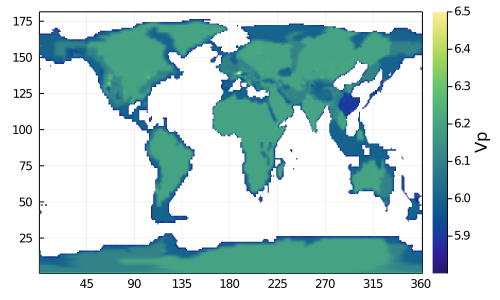

In [133]:
g = globe(coord[:,1], coord[:,2], g3d_vp[:,2])
println(size(g))

g[g.<5.8] .= NaN

heatmap(g, colorbar_title="Vp", size=(500,300),xticks=linspace(0,360,9),
    framestyle=:box,color=cgrad(:haline))

In [128]:
hmmm = readdlm("/Users/gailin/Downloads/LLNL_G3Dv3_Vp_Model/LLNL_G3Dv3.Interpolated.Layer20_Upper_Mantle_220km.txt");

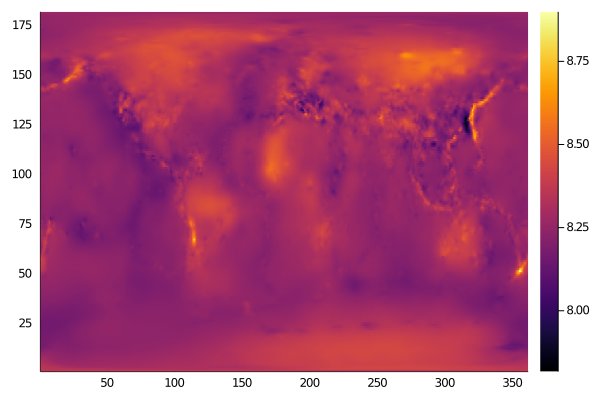

In [130]:
# Looks mugh higher resolution in the mantle. 

g = globe(coord[:,1], coord[:,2], hmmm[:,2])
heatmap(g)

# G3D_JPS

In [3]:
jps_vp = readdlm("/Users/gailin/Downloads/LLNL_G3D_JPS.Interpolated/LLNL_G3D_JPS.Interpolated.Surface.11.Crust_11_Top_of_upper_crust.txt");
jps_vp2 = readdlm("/Users/gailin/Downloads/LLNL_G3D_JPS.Interpolated/LLNL_G3D_JPS.Interpolated.Surface.12.Crust_12_Bottom_of_upper_crust.txt");
#jps_vp_middle = readdlm("../data/G3Dv3/LLNL_G3Dv3.Interpolated.Layer11_Middle_Crust_top.txt");
#jps_vp_lower = readdlm("../data/G3Dv3/LLNL_G3Dv3.Interpolated.Layer13_Lower_Crust_top.txt");
jps_coord = readdlm("/Users/gailin/Downloads/LLNL_G3D_JPS.Interpolated/LLNL_G3D_JPS.Interpolated.Coordinates.txt");

(181, 361)


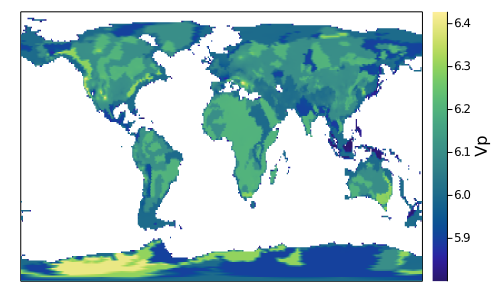

In [27]:
g = globe(jps_coord[:,1], jps_coord[:,2], jps_vp[:,3])
println(size(g))

g[g.<5.8] .= NaN

jps_map = heatmap(g, colorbar_title="Vp", size=(500,300), xticks=linspace(0,360,0),yticks=linspace(0,178,0),
    framestyle=:box,color=cgrad(:haline))

#savefig("../../present/4_16/jps_vp_upper_crust.png")

(181, 361)


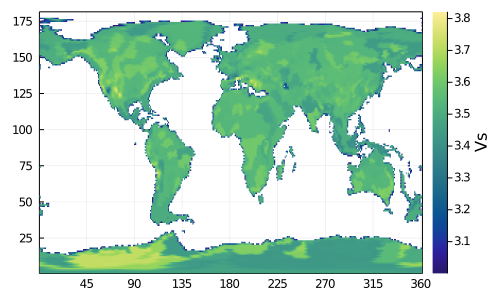

In [141]:
g = globe(jps_coord[:,1], jps_coord[:,2], jps_vp[:,5])
println(size(g))

g[g.<3] .= NaN

heatmap(g, colorbar_title="Vs", size=(500,300),xticks=linspace(0,360,9),
    framestyle=:box,color=cgrad(:haline))

# Crust1.0

In [8]:
crust1_vp, crust1_vs, crust1_rho = find_crust1_seismic(jps_coord[:,1], jps_coord[:,2], 6);

(181, 361)


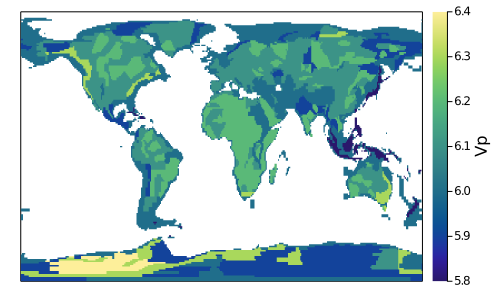

In [29]:
g = globe(jps_coord[:,1], jps_coord[:,2], crust1_vp)
println(size(g))

g[g.<5.8] .= NaN

crust1_map = heatmap(g, colorbar_title="Vp", size=(500,300),xticks=linspace(0,360,0),yticks=linspace(0,178,0),
    framestyle=:box,color=cgrad(:haline))
#savefig("../../present/4_16/crut1_upper_vp.png")

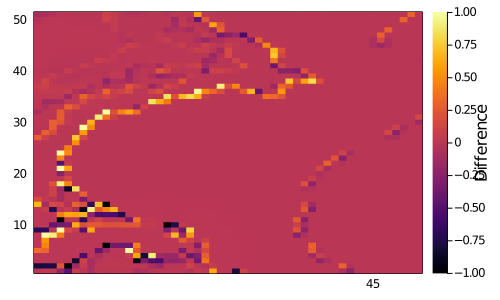

In [171]:
dif = jps_vp[:,3] .- crust1_vp

g1 = globe(jps_coord[:,1], jps_coord[:,2], jps_vp[:,3])
g2 = globe(jps_coord[:,1], jps_coord[:,2], crust1_vp)

# wiggle 
# rows = size(g1)[1]
# g1[2:end,:] .= g1[1:rows-1,:]
# g1[1,:] .= NaN

# cols = size(g2)[2]
# g2[:,2:end] .= g2[:,1:cols-1]
# g2[:,1] .= NaN


heatmap((g1 .- g2)[100:150,100:150], colorbar_title="Difference", size=(500,300),xticks=linspace(0,360,9),
    framestyle=:box)

In [41]:
minimum(rand(20))

0.006131337398494141